# Online Retailer Sales Analysis Project

***

# **Introduction**

- This dataset Online Retail Sales and Customer Data is downloaded from kaggle.com
- Data is in tabular format(.csv file) of 9 columns and 541909 entries.
- The dataset contains entries for invoices for each customer with timestamp, geographical location, product, quantity and price.
- Columns are: index, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country      


In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy.interpolate import make_interp_spline
import plotly.express as px

plt.style.use('fast')

%matplotlib inline


In [253]:
df = pd.read_csv('Data/online_retail.csv')


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# **Data Exploration**

In [254]:
df.head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [255]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [256]:
df.isnull().sum()


index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Index Column

In [257]:
df.shape


(541909, 9)

In [258]:
pd.Series(df['index'].unique()).count()


541909

# InvoiceNo Column

In [259]:
df['InvoiceNo'].value_counts()


InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

# StockCode Column

In [260]:
df['StockCode'].value_counts()


StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

# Description Column

In [261]:
df['Description'].isnull().sum()


1454

In [262]:
df[df['Description'].isnull()]


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
535322,535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


# Quantity Column

In [263]:
df[df['Quantity'] > 0].head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [264]:
df[df['Quantity'] < 0].head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [265]:
# count of positive values in Quantity Column

pos_values = 0
neg_values = 0

for i in df['Quantity']:
  if i > 0:
    pos_values += 1
  else:
    neg_values += 1

pos_values, neg_values


(531285, 10624)

In [266]:
df.sort_values(by = ['Quantity', 'InvoiceDate'])


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
421632,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
74614,74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
502122,502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
61619,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom


In [267]:
df.iloc[[540421, 540422],:]


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


# InvoiceDate Column

In [268]:
df.InvoiceDate.unique()


array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

In [269]:
len(df.InvoiceDate.unique())


23260

# UnitPrice Column

In [270]:
df.sort_values(by = ['UnitPrice']).head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom


# CustomerID Column

In [271]:
df['CustomerID'].value_counts()


CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [272]:
df['CustomerID'].isnull().sum()


135080

In [273]:
df[df['CustomerID'].isnull()].head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


# Country Column

In [274]:
df['Country'].value_counts()


Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# **Data Cleaning**

In [275]:
df = df.drop_duplicates()
df.shape


(541909, 9)

In [276]:
df = df.drop(columns = ['index'])


In [277]:
df = df.rename(columns = {'UnitPrice': 'UnitPrice_GBP'})


In [278]:
df['Description'] = df['Description'].fillna('UNKNOWN')


In [279]:
df['CustomerID'] = df['CustomerID'].fillna(0)


In [280]:
df.iloc[[622 , 1443, 1444, 1445, 1446],:]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
622,536414,22139,UNKNOWN,56,12/1/2010 11:52,0.00,0.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,0.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,0.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,0.0,United Kingdom


In [281]:
df = df.astype({'CustomerID': 'int'})
df = df.astype({'CustomerID': 'str'})


In [282]:
df = df.replace({'CustomerID': {'0': 'A' + df['InvoiceNo']}})


In [283]:
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom


In [284]:
df.iloc[[622 , 1443, 1444, 1445, 1446],:]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
622,536414,22139,UNKNOWN,56,12/1/2010 11:52,0.00,A536414,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,A536544,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,A536544,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,A536544,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,A536544,United Kingdom


In [285]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [286]:
df['InvoiceDate'].dt.year.value_counts()


InvoiceDate
2011    499428
2010     42481
Name: count, dtype: int64

In [287]:
df = df[df['InvoiceDate'].dt.year == 2011]


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# **Feature Engineering**

In [288]:
df = df.reset_index(drop = True)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom


# Price_GBP Column

In [289]:
df['Price_GBP'] = df['Quantity'] * df['UnitPrice_GBP']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5


# InvoiceDate and Price_GBP Column

In [290]:
# df['Year_Month']  = df['InvoiceDate'].apply(lambda x: x.strftime('%B-%Y'))
# df['Year_Month']  = pd.to_datetime(df['Year_Month'], format = '%B-%Y')
# df['Year']        = df['InvoiceDate'].dt.year.astype('str')


In [291]:
df['Month']       = df['InvoiceDate'].dt.month_name()
df['Day']         = df['InvoiceDate'].dt.day_name()
df['Hour']        = df['InvoiceDate'].dt.hour


In [292]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP,Month,Day,Hour
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,January,Tuesday,10
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,January,Tuesday,10
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,January,Tuesday,10
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,January,Tuesday,10
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,January,Tuesday,10


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# **Data Wrangling**

# Country

In [293]:
countries = pd.DataFrame(df['Country'].value_counts()).reset_index()
countries = countries.rename(columns = {'count': 'CountofCountryRecords'})
countries


,Country,CountofCountryRecords
0,United Kingdom,455353
1,Germany,8930
2,France,8118
3,EIRE,7793
4,Spain,2458
5,Netherlands,2299
6,Belgium,1974
7,Switzerland,1953
8,Portugal,1399
9,Australia,1224


In [294]:
countries = countries[countries['CountofCountryRecords'] < 500]
df['Country'] = df['Country'].apply(
    lambda x: 'Other' if x in list(countries['Country']) else x
)
df['Country'].value_counts()


Country
United Kingdom     455353
Germany              8930
France               8118
EIRE                 7793
Other                4268
Spain                2458
Netherlands          2299
Belgium              1974
Switzerland          1953
Portugal             1399
Australia            1224
Norway                939
Italy                 762
Channel Islands       741
Finland               678
Cyprus                539
Name: count, dtype: int64

In [295]:
# cols = ['InvoiceNo', 'StockCode', 'InvoiceDate', 'Description', 'CustomerID',
#         'Quantity', 'UnitPrice_GBP', 'Price_GBP', 'Country',
#         'Month_Year', 'Year', 'Month', 'Day', 'Weekday', 'Hour']

# df = df.reindex(columns = cols)


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# **Data Analysis**

# Sales VS Time

In [296]:
df.head(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP,Month,Day,Hour
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,January,Tuesday,10


In [297]:
# sales_year_month = df.groupby('Year_Month')[['Price_GBP']].sum().reset_index()
# sales_year_month


In [298]:
# sales_year = df.groupby('Year')[['Price_GBP']].sum().reset_index()
# sales_year


In [299]:
sales_month = df.groupby('Month')[['Price_GBP']].sum().reset_index()
month_list  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_month.index = pd.CategoricalIndex(sales_month['Month'], categories = month_list, ordered = True)
sales_month = sales_month.sort_index().reset_index(drop = True)
sales_month


,Month,Price_GBP
0,January,560000.260
1,February,498062.650
2,March,683267.080
3,April,493207.121
4,May,723333.510
5,June,691123.120
6,July,681300.111
7,August,682680.510
8,September,1019687.622
9,October,1070704.670


In [300]:
sales_day = df.groupby('Day')[['Price_GBP']].sum().reset_index()
day_list  = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sales_day.index = pd.CategoricalIndex(sales_day['Day'], categories = day_list, ordered = True)
sales_day = sales_day.sort_index().reset_index(drop = True)
sales_day


,Day,Price_GBP
0,Sunday,749536.711
1,Monday,1474628.161
2,Tuesday,1831182.511
3,Wednesday,1595743.350
4,Thursday,1953648.930
5,Friday,1394051.251


In [301]:
sales_hour = df.groupby('Hour')[['Price_GBP']].sum().reset_index()
sales_hour


,Hour,Price_GBP
0,6,-497.350
1,7,30542.320
2,8,275697.830
3,9,706609.601
4,10,1245066.951
5,11,1063969.780
6,12,1278351.170
7,13,1092389.000
8,14,992998.771
9,15,1066294.300


# Sales by Country

In [302]:
countries = pd.DataFrame(df.groupby(['Country']).agg({'Price_GBP': [np.sum, np.mean]}))
countries = countries.reset_index()
countries = countries.sort_values(by = [('Price_GBP', 'sum')], ascending = False)
countries


Country    Price_GBP            
                             sum        mean
15   United Kingdom  7511063.744   16.495035
9       Netherlands   275877.060  119.998721
4              EIRE   254246.870   32.625031
7           Germany   207135.370   23.195450
6            France   187828.540   23.137292
11            Other   152483.410   35.727134
0         Australia   136072.170  111.170074
14      Switzerland    55080.430   28.202985
13            Spain    52930.850   21.534113
1           Belgium    39101.050   19.808029
10           Norway    31376.340   33.414633
12         Portugal    26986.900   19.290136
5           Finland    21433.940   31.613481
2   Channel Islands    19722.760   26.616410
8             Italy    16096.010   21.123373
3            Cyprus    11355.470   21.067662

In [303]:
countries.columns


MultiIndex([(  'Country',     ''),
            ('Price_GBP',  'sum'),
            ('Price_GBP', 'mean')],
           )

In [304]:
countries[('Price_GBP', 'sum')]


15    7511063.744
9      275877.060
4      254246.870
7      207135.370
6      187828.540
11     152483.410
0      136072.170
14      55080.430
13      52930.850
1       39101.050
10      31376.340
12      26986.900
5       21433.940
2       19722.760
8       16096.010
3       11355.470
Name: (Price_GBP, sum), dtype: float64

In [305]:
countries.index[countries['Country'] == 'United Kingdom'].to_list()


[15]

# Sales by Customer

In [306]:
customers = pd.DataFrame()
customers['Price_GBP'] = pd.DataFrame(df.groupby('CustomerID')['Price_GBP'].sum())
customers = customers.reset_index()
customers = customers.sort_values(by = 'Price_GBP', ascending = False)
customers


,CustomerID,Price_GBP
1663,14646,270897.14
4111,18102,228603.88
3659,17450,185453.33
1851,14911,125815.49
55,12415,123725.45
...,...,...
7471,AA563186,-11062.06
7635,AC580604,-11586.50
7474,AC540118,-16453.71
7473,AC540117,-16888.02


# StockCode (Product Analysis)

In [307]:
stock_code = df.groupby('StockCode')[['Price_GBP']].sum().reset_index().sort_values(by = ['Price_GBP'], ascending = False)
stock_code


,StockCode,Price_GBP
3983,DOT,181574.290
1323,22423,137864.830
2696,47566,97095.240
3474,85123A,88815.540
3454,85099B,88383.680
...,...,...
3964,BANK CHARGES,-6128.339
3966,CRUK,-7933.430
3963,B,-11062.060
3984,M,-68620.280


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Sales & Countries & Time

In [487]:
sales_month_country = df.groupby(['Month', 'Country'])[['Price_GBP']].sum().reset_index()
sales_month_country.head()


,Month,Country,Price_GBP
0,April,Australia,333.40
1,April,Belgium,1954.15
2,April,Channel Islands,293.00
3,April,Cyprus,-35.80
4,April,EIRE,7570.50


In [488]:
sales_month_country = pd.pivot_table(sales_month_country, index = 'Month', columns = 'Country', values = 'Price_GBP')
sales_month_country


Country,Australia,Belgium,Channel Islands,Cyprus,EIRE,Finland,France,Germany,Italy,Netherlands,Norway,Other,Portugal,Spain,Switzerland,United Kingdom
Month,,,,,,,,,,,,,,,,
April,333.40,1954.15,293.00,-35.80,7570.50,1626.81,4195.21,11963.37,737.83,2976.56,NaN,14042.46,1687.75,1785.65,1822.19,442254.041
August,22489.20,3536.12,4892.53,NaN,12157.47,1371.55,13789.26,19023.65,1934.80,39655.81,1984.46,13296.16,1206.40,3330.41,4882.19,539130.500
December,NaN,1409.43,194.15,-91.25,7323.04,1230.68,7048.83,7804.70,200.45,11728.02,2785.70,2225.45,2801.95,271.43,NaN,388735.430
February,14627.47,2161.32,1784.71,4013.55,9674.14,205.16,8438.91,8969.24,251.50,22932.11,630.90,10175.46,1213.90,2093.70,2642.67,408247.910
January,9017.71,1154.05,645.08,547.50,21656.52,889.02,17503.07,16451.43,2361.36,26611.16,NaN,13447.18,3998.11,7178.54,4231.23,434308.300
July,4767.57,2473.62,NaN,NaN,42740.65,2996.73,9888.99,15721.66,147.10,26.02,890.07,22525.23,2287.85,7578.17,3776.61,565479.841
June,25164.77,4273.17,2060.03,1109.32,20060.25,329.56,15991.87,13081.02,162.27,26843.09,5886.86,9588.41,879.51,3332.44,7882.20,554478.350
March,17055.29,3333.58,3509.33,938.39,18783.23,5924.62,14516.90,14170.02,1778.91,22416.49,304.68,10970.52,2660.85,5326.65,1870.23,559707.390
May,13628.51,2727.00,903.79,NaN,17921.35,NaN,17527.08,25571.35,587.45,29185.88,NaN,11408.60,587.83,3257.60,3567.21,596459.860


In [489]:
sales_month_country = sales_month_country.reset_index()
sales_month_country


Country,Month,Australia,Belgium,Channel Islands,Cyprus,EIRE,Finland,France,Germany,Italy,Netherlands,Norway,Other,Portugal,Spain,Switzerland,United Kingdom
0,April,333.40,1954.15,293.00,-35.80,7570.50,1626.81,4195.21,11963.37,737.83,2976.56,NaN,14042.46,1687.75,1785.65,1822.19,442254.041
1,August,22489.20,3536.12,4892.53,NaN,12157.47,1371.55,13789.26,19023.65,1934.80,39655.81,1984.46,13296.16,1206.40,3330.41,4882.19,539130.500
2,December,NaN,1409.43,194.15,-91.25,7323.04,1230.68,7048.83,7804.70,200.45,11728.02,2785.70,2225.45,2801.95,271.43,NaN,388735.430
3,February,14627.47,2161.32,1784.71,4013.55,9674.14,205.16,8438.91,8969.24,251.50,22932.11,630.90,10175.46,1213.90,2093.70,2642.67,408247.910
4,January,9017.71,1154.05,645.08,547.50,21656.52,889.02,17503.07,16451.43,2361.36,26611.16,NaN,13447.18,3998.11,7178.54,4231.23,434308.300
5,July,4767.57,2473.62,NaN,NaN,42740.65,2996.73,9888.99,15721.66,147.10,26.02,890.07,22525.23,2287.85,7578.17,3776.61,565479.841
6,June,25164.77,4273.17,2060.03,1109.32,20060.25,329.56,15991.87,13081.02,162.27,26843.09,5886.86,9588.41,879.51,3332.44,7882.20,554478.350
7,March,17055.29,3333.58,3509.33,938.39,18783.23,5924.62,14516.90,14170.02,1778.91,22416.49,304.68,10970.52,2660.85,5326.65,1870.23,559707.390
8,May,13628.51,2727.00,903.79,NaN,17921.35,NaN,17527.08,25571.35,587.45,29185.88,NaN,11408.60,587.83,3257.60,3567.21,596459.860
9,November,6805.99,6229.41,1495.17,460.89,30413.05,2950.24,30697.51,26044.35,4243.75,25856.01,6527.50,17930.87,2644.90,8533.87,8116.96,1282805.780


In [490]:
month_list  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_month_country.index = pd.CategoricalIndex(sales_month_country['Month'], categories = month_list, ordered = True)
sales_month_country.index


CategoricalIndex(['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
                 categories=['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December'], ordered=True, dtype='category', name='Month')

In [492]:
sales_month_country = sales_month_country.sort_index().reset_index(drop = True)
sales_month_country = sales_month_country.set_index('Month')
sales_month_country


Country,Australia,Belgium,Channel Islands,Cyprus,EIRE,Finland,France,Germany,Italy,Netherlands,Norway,Other,Portugal,Spain,Switzerland,United Kingdom
Month,,,,,,,,,,,,,,,,
January,9017.71,1154.05,645.08,547.50,21656.52,889.02,17503.07,16451.43,2361.36,26611.16,NaN,13447.18,3998.11,7178.54,4231.23,434308.300
February,14627.47,2161.32,1784.71,4013.55,9674.14,205.16,8438.91,8969.24,251.50,22932.11,630.90,10175.46,1213.90,2093.70,2642.67,408247.910
March,17055.29,3333.58,3509.33,938.39,18783.23,5924.62,14516.90,14170.02,1778.91,22416.49,304.68,10970.52,2660.85,5326.65,1870.23,559707.390
April,333.40,1954.15,293.00,-35.80,7570.50,1626.81,4195.21,11963.37,737.83,2976.56,NaN,14042.46,1687.75,1785.65,1822.19,442254.041
May,13628.51,2727.00,903.79,NaN,17921.35,NaN,17527.08,25571.35,587.45,29185.88,NaN,11408.60,587.83,3257.60,3567.21,596459.860
June,25164.77,4273.17,2060.03,1109.32,20060.25,329.56,15991.87,13081.02,162.27,26843.09,5886.86,9588.41,879.51,3332.44,7882.20,554478.350
July,4767.57,2473.62,NaN,NaN,42740.65,2996.73,9888.99,15721.66,147.10,26.02,890.07,22525.23,2287.85,7578.17,3776.61,565479.841
August,22489.20,3536.12,4892.53,NaN,12157.47,1371.55,13789.26,19023.65,1934.80,39655.81,1984.46,13296.16,1206.40,3330.41,4882.19,539130.500
September,5031.73,4197.82,1321.65,196.35,42639.05,1105.45,23198.87,17720.31,279.80,26937.26,8678.94,11510.32,1433.22,5163.74,8254.96,862018.152


# Data Visualization

# Sales & Countries & Time

In [493]:
sales_month_country


Country,Australia,Belgium,Channel Islands,Cyprus,EIRE,Finland,France,Germany,Italy,Netherlands,Norway,Other,Portugal,Spain,Switzerland,United Kingdom
Month,,,,,,,,,,,,,,,,
January,9017.71,1154.05,645.08,547.50,21656.52,889.02,17503.07,16451.43,2361.36,26611.16,NaN,13447.18,3998.11,7178.54,4231.23,434308.300
February,14627.47,2161.32,1784.71,4013.55,9674.14,205.16,8438.91,8969.24,251.50,22932.11,630.90,10175.46,1213.90,2093.70,2642.67,408247.910
March,17055.29,3333.58,3509.33,938.39,18783.23,5924.62,14516.90,14170.02,1778.91,22416.49,304.68,10970.52,2660.85,5326.65,1870.23,559707.390
April,333.40,1954.15,293.00,-35.80,7570.50,1626.81,4195.21,11963.37,737.83,2976.56,NaN,14042.46,1687.75,1785.65,1822.19,442254.041
May,13628.51,2727.00,903.79,NaN,17921.35,NaN,17527.08,25571.35,587.45,29185.88,NaN,11408.60,587.83,3257.60,3567.21,596459.860
June,25164.77,4273.17,2060.03,1109.32,20060.25,329.56,15991.87,13081.02,162.27,26843.09,5886.86,9588.41,879.51,3332.44,7882.20,554478.350
July,4767.57,2473.62,NaN,NaN,42740.65,2996.73,9888.99,15721.66,147.10,26.02,890.07,22525.23,2287.85,7578.17,3776.61,565479.841
August,22489.20,3536.12,4892.53,NaN,12157.47,1371.55,13789.26,19023.65,1934.80,39655.81,1984.46,13296.16,1206.40,3330.41,4882.19,539130.500
September,5031.73,4197.82,1321.65,196.35,42639.05,1105.45,23198.87,17720.31,279.80,26937.26,8678.94,11510.32,1433.22,5163.74,8254.96,862018.152


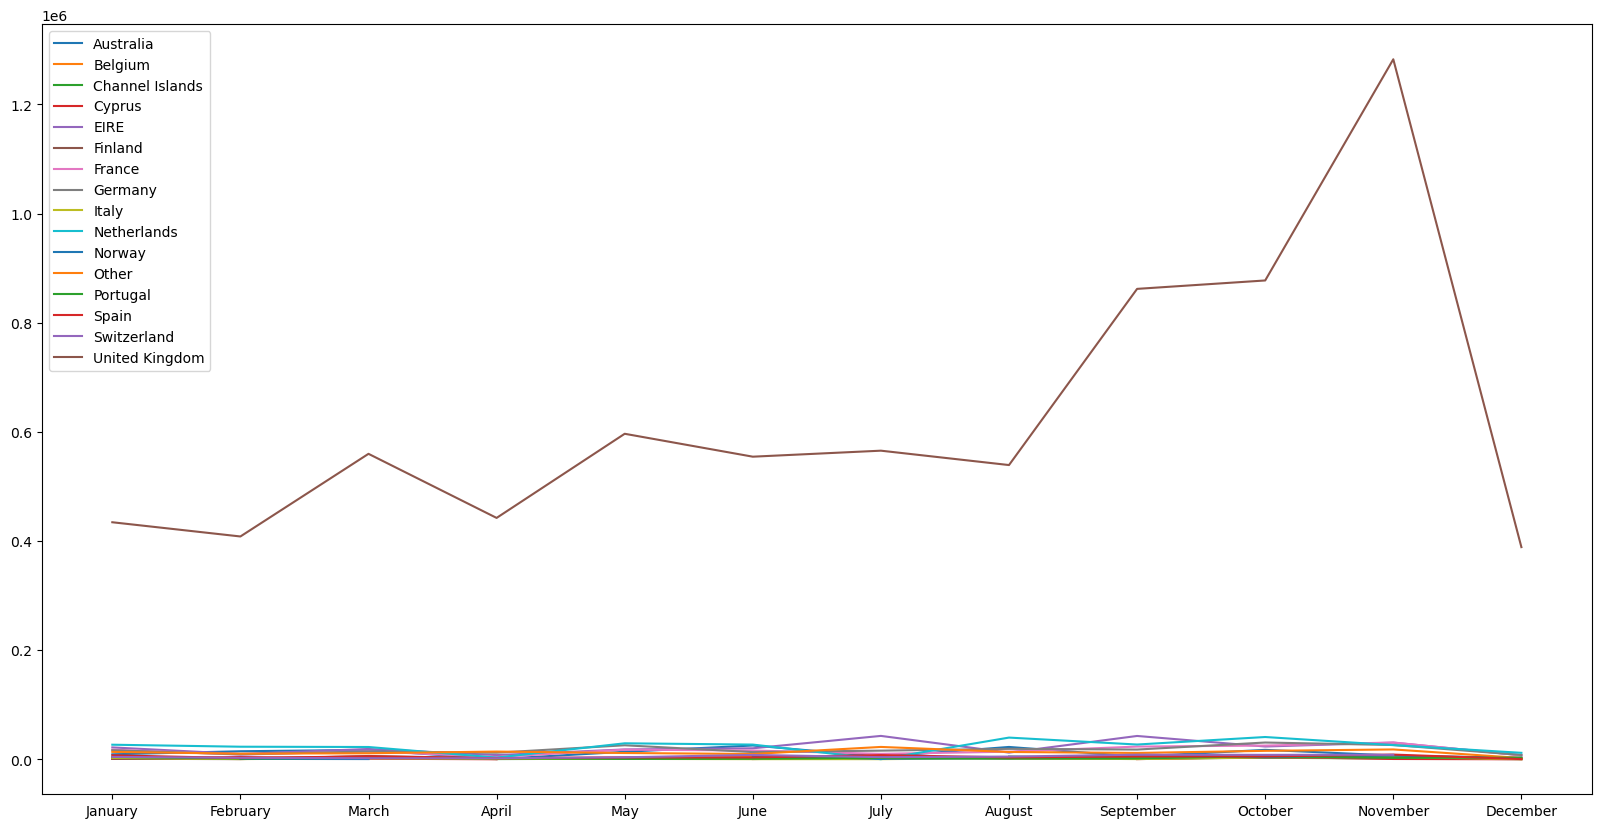

In [494]:
plt.figure(figsize = (20, 10))
for i in sales_month_country.columns:
    plt.plot(sales_month_country.index, sales_month_country[i], label = str(i))
plt.legend()
plt.show()


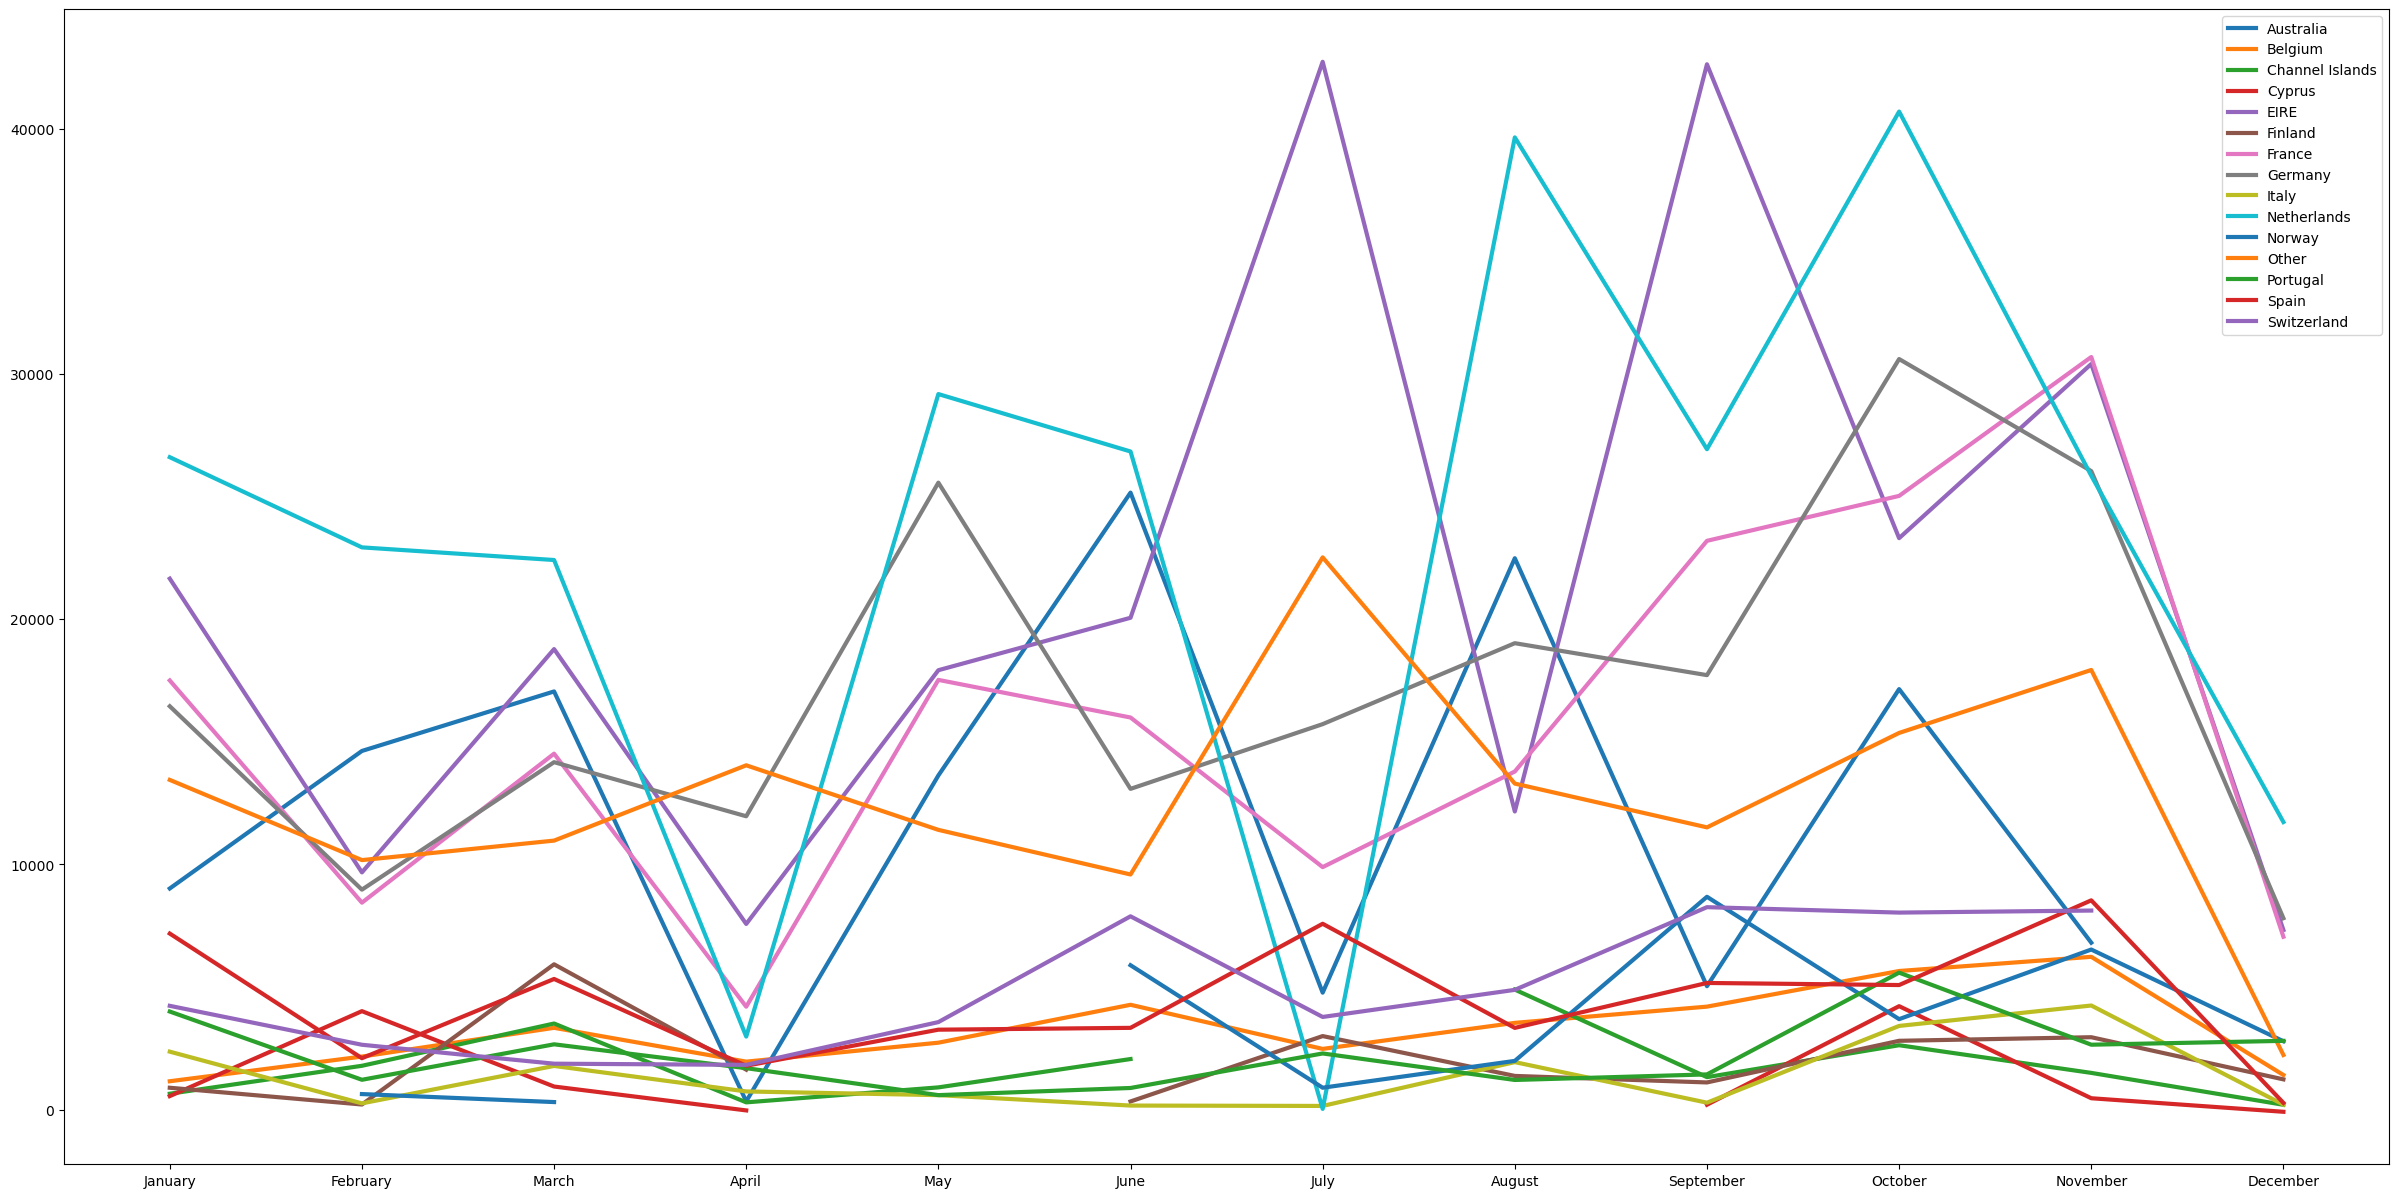

In [495]:
sales_month_country_copy = sales_month_country.copy()
sales_month_country_copy = sales_month_country_copy.drop(columns = ['United Kingdom'])
plt.figure(figsize = (30, 15))
for i in sales_month_country_copy.columns:
    plt.plot(sales_month_country_copy.index, sales_month_country_copy[i], label = str(i), linewidth = 3)
plt.legend()
plt.show()


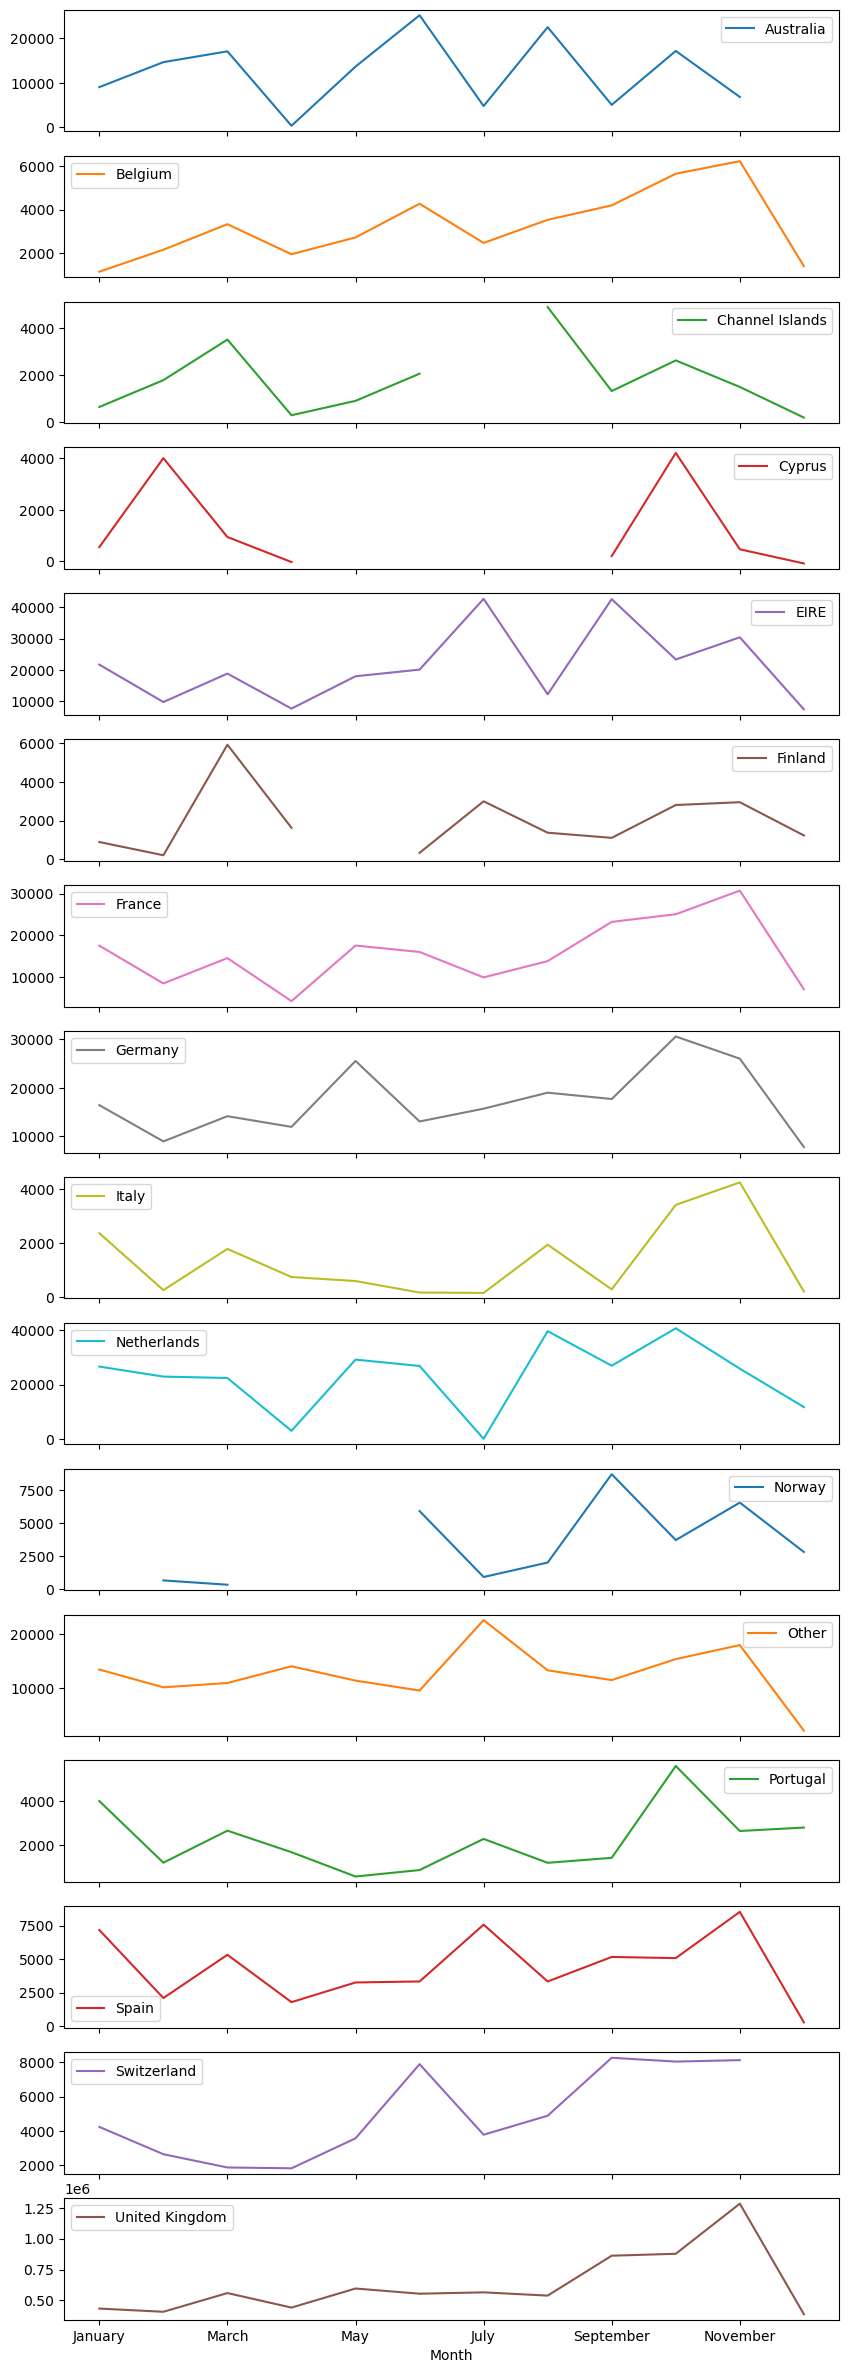

In [496]:
sales_month_country.plot(subplots = True, figsize = (10,30))
plt.show()


In [497]:
h = df.groupby(['Month', 'Country'])[['Price_GBP']].sum().reset_index()
h


,Month,Country,Price_GBP
0,April,Australia,333.400
1,April,Belgium,1954.150
2,April,Channel Islands,293.000
3,April,Cyprus,-35.800
4,April,EIRE,7570.500
...,...,...,...
177,September,Other,11510.320
178,September,Portugal,1433.220
179,September,Spain,5163.740
180,September,Switzerland,8254.960


In [498]:
h.index = pd.CategoricalIndex(h['Month'], categories = month_list, ordered = True)
h = h.sort_index().reset_index(drop = True)
h


,Month,Country,Price_GBP
0,January,Finland,889.02
1,January,Belgium,1154.05
2,January,Channel Islands,645.08
3,January,Cyprus,547.50
4,January,EIRE,21656.52
...,...,...,...
177,December,EIRE,7323.04
178,December,Cyprus,-91.25
179,December,Belgium,1409.43
180,December,Italy,200.45


In [499]:
px.scatter(h, x = h['Month'], y = h['Price_GBP'], color = h['Country'])


# Sales by Country

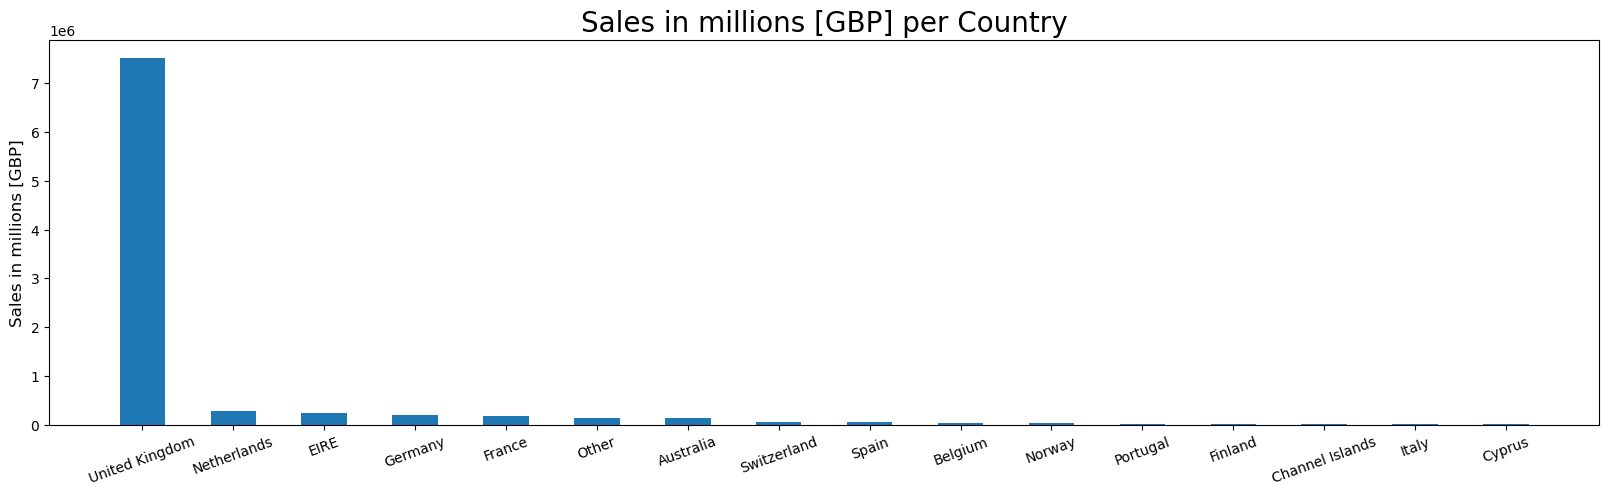

In [501]:
# display sales by each country

plt.figure(figsize = (20,5))
plt.bar(countries['Country'], countries[('Price_GBP', 'sum')], width = 0.5)
plt.xticks(rotation = 20)
plt.ylabel('Sales in millions [GBP]', fontsize = 12)
plt.title('Sales in millions [GBP] per Country', fontsize = 20)
plt.show()


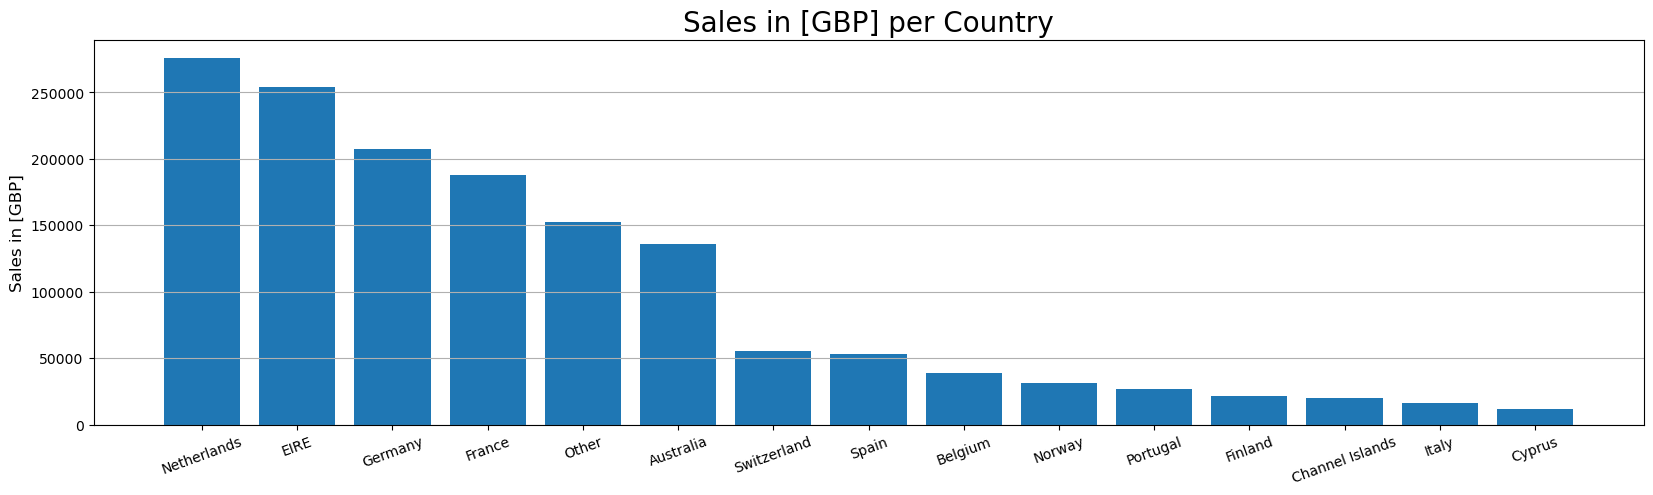

In [502]:
# exclude United Kingdom from graph to comparine other countries

plt.figure(figsize = (20,5))
plt.bar(countries['Country'].drop([15]), countries[('Price_GBP',  'sum')].drop([15]))
plt.xticks(rotation = 20)
plt.ylabel('Sales in [GBP]', fontsize = 12)
plt.title('Sales in [GBP] per Country', fontsize = 20)
plt.grid(axis = 'y')
plt.show()


# Sales by Time

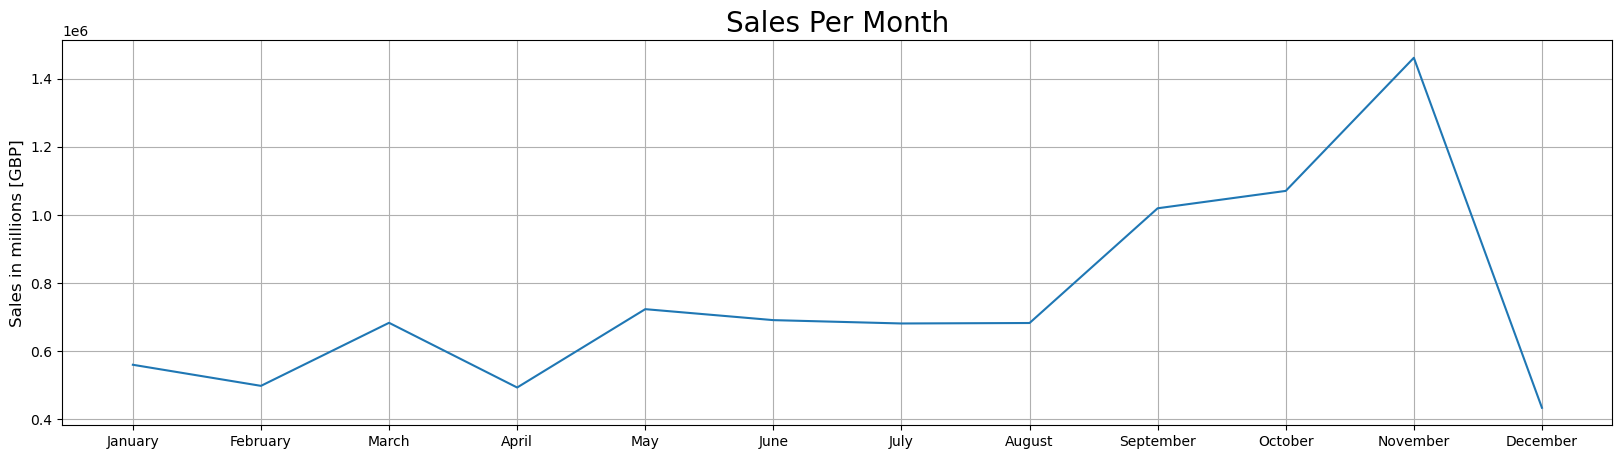

In [503]:
# sales by month

plt.figure(figsize = (20,5))
plt.plot(sales_month['Month'], sales_month['Price_GBP'])
plt.ylabel('Sales in millions [GBP]', fontsize = 12)
plt.title('Sales Per Month', fontsize = 20)
plt.grid()
plt.show()


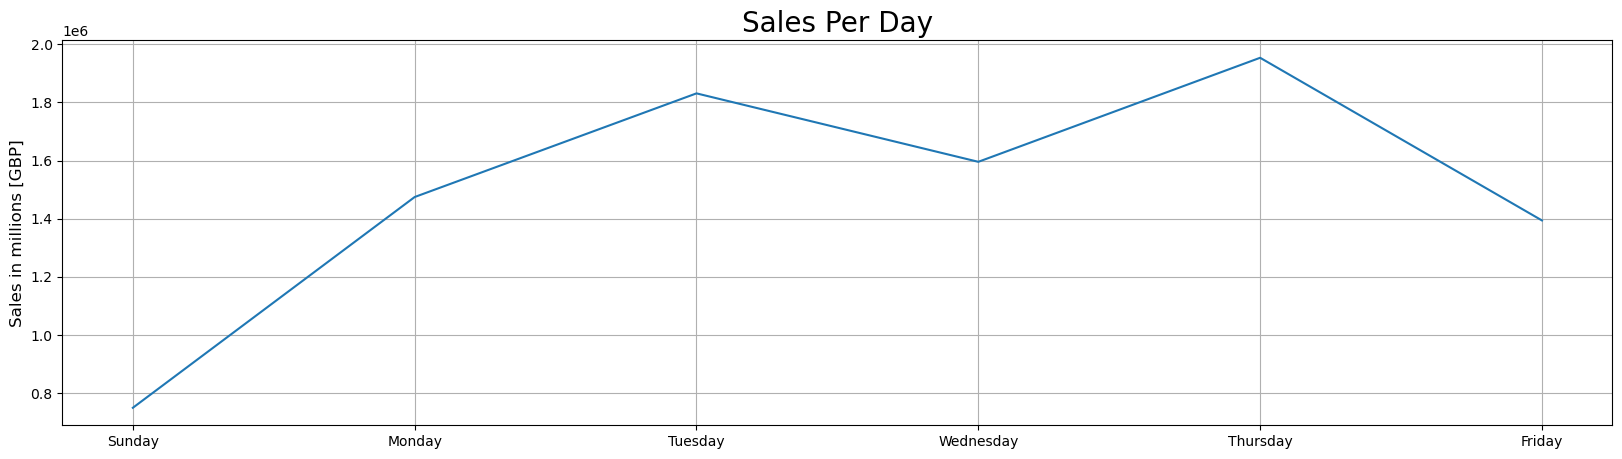

In [505]:
# sales by day

plt.figure(figsize = (20,5))
plt.plot(sales_day['Day'], sales_day['Price_GBP'])
plt.ylabel('Sales in millions [GBP]', fontsize = 12)
plt.title('Sales Per Day', fontsize = 20)
plt.grid()
plt.show()


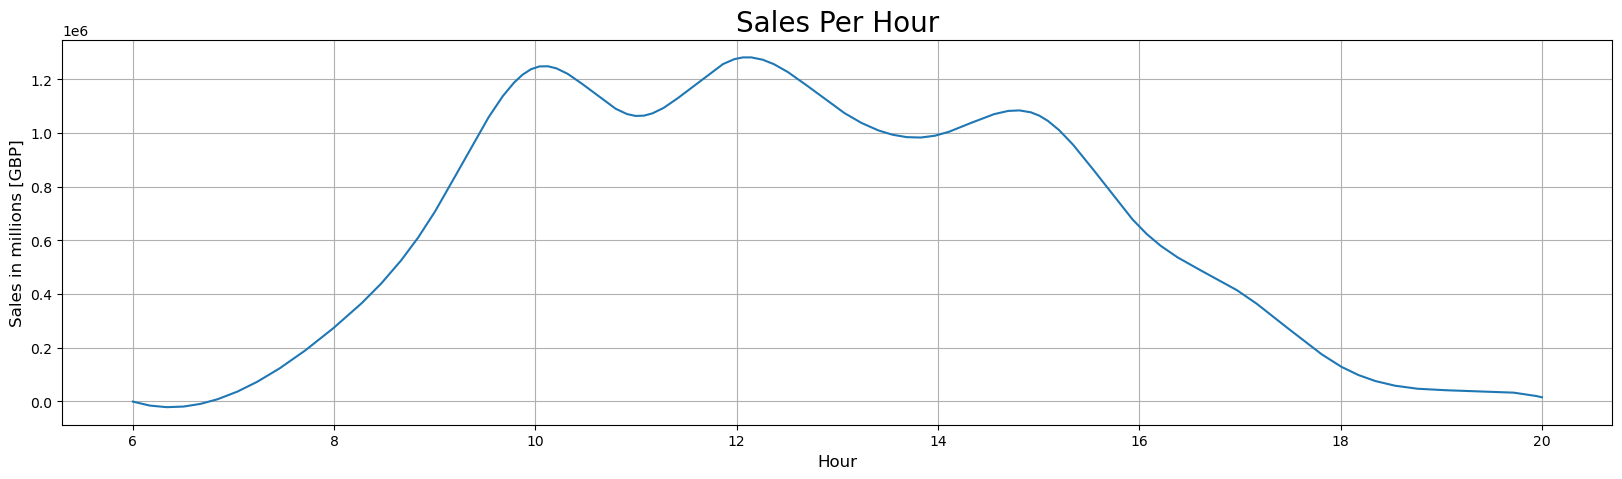

In [506]:
# sales by hour

plt.figure(figsize = (20,5))
x, y = sales_hour['Hour'], sales_hour['Price_GBP']
XY_Spline = make_interp_spline(x, y)
X = np.linspace(x.min(), x.max(), 500)
Y = XY_Spline(X)
plt.plot(X, Y)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Sales in millions [GBP]', fontsize = 12)
plt.title('Sales Per Hour', fontsize = 20)
plt.grid()
plt.show()


# Top Customers

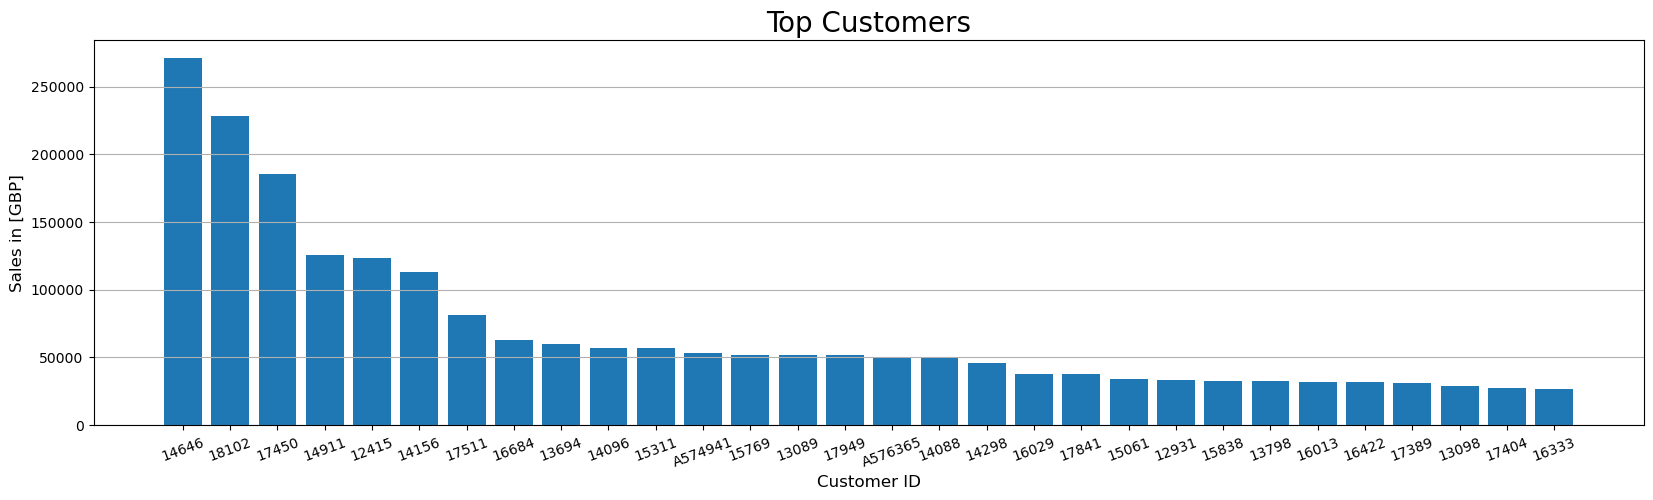

In [507]:
plt.figure(figsize = (20,5))
plt.bar(customers['CustomerID'][0:30],customers['Price_GBP'][0:30])
plt.xticks(rotation = 20)
plt.xlabel('Customer ID', fontsize = 12)
plt.ylabel('Sales in [GBP]', fontsize = 12)
plt.title('Top Customers', fontsize = 20)
plt.grid(axis = 'y')
plt.show()


# Top Products

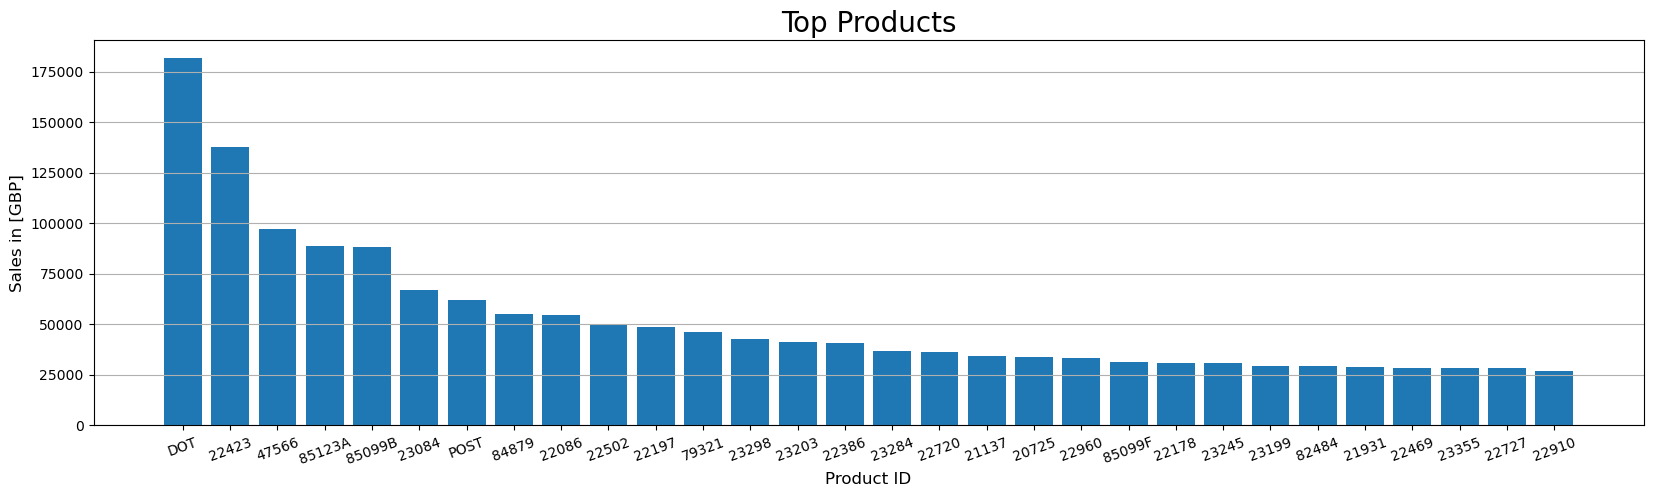

In [508]:
plt.figure(figsize = (20,5))
plt.bar(stock_code['StockCode'][0:30],stock_code['Price_GBP'][0:30])
plt.xticks(rotation = 20)
plt.xlabel('Product ID', fontsize = 12)
plt.ylabel('Sales in [GBP]', fontsize = 12)
plt.title('Top Products', fontsize = 20)
plt.grid(axis = 'y')
plt.show()


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

**End of Project**